# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

conteo = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {conteo} | {city_record}")
        conteo = conteo + 1
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Sola
Processing Record 2 | Kropotkin
Processing Record 3 | Rikitea
Processing Record 4 | Longonjo
Processing Record 5 | Hobart
Processing Record 6 | Tuktoyaktuk
Processing Record 7 | Mataura
Processing Record 8 | Busselton
Processing Record 9 | Vaini
Processing Record 10 | Punta Arenas
Processing Record 11 | Pensacola
Processing Record 12 | Lavrentiya
Processing Record 13 | Toba
City not found. Skipping...
Processing Record 14 | Taltal
Processing Record 15 | Touros
Processing Record 16 | Kapaa
Processing Record 17 | Chokurdakh
Processing Record 18 | Saskylakh
City not found. Skipping...
Processing Record 19 | Barrow
Processing Record 20 | Yulara
Processing Record 21 | Ushuaia
Processing Record 22 | Jamestown
Processing Record 23 | Strangnas
Processing Record 24 | New Norfolk
Processing Record 25 | Kilindoni
City not found. Skipping...
Processing Record 26 | Port Lincoln
Processing Record 27 | Hilo
City not f

Processing Record 222 | Faanui
Processing Record 223 | Namtsy
Processing Record 224 | Souillac
Processing Record 225 | Havre-Saint-Pierre
Processing Record 226 | Sitka
Processing Record 227 | Mamallapuram
Processing Record 228 | Clyde River
Processing Record 229 | Mandalgovi
Processing Record 230 | Kaputa
City not found. Skipping...
City not found. Skipping...
Processing Record 231 | Jaffna
Processing Record 232 | Rawson
Processing Record 233 | Oranjestad
Processing Record 234 | Tuatapere
Processing Record 235 | Rioja
Processing Record 236 | Nanortalik
Processing Record 237 | Arlit
Processing Record 238 | Darab
Processing Record 239 | Natitingou
Processing Record 240 | Ust-Nera
Processing Record 241 | Monrovia
Processing Record 242 | Apache Junction
Processing Record 243 | Berdigestyakh
Processing Record 244 | Panguna
Processing Record 245 | Beringovskiy
Processing Record 246 | Adrar
Processing Record 247 | Graham
Processing Record 248 | Young
Processing Record 249 | Iquique
Processing

Processing Record 447 | Narrabri
Processing Record 448 | Donetsk
Processing Record 449 | Aquidauana
Processing Record 450 | Sibu
Processing Record 451 | Krutikha
Processing Record 452 | Polson
Processing Record 453 | Honningsvag
Processing Record 454 | Dawlatabad
Processing Record 455 | Zarya
Processing Record 456 | Dunkirk
Processing Record 457 | Berlevag
Processing Record 458 | Paita
Processing Record 459 | Nortelandia
Processing Record 460 | Yertsevo
City not found. Skipping...
Processing Record 461 | Fond du Lac
Processing Record 462 | Cayenne
Processing Record 463 | Bongandanga
Processing Record 464 | Fairbanks
Processing Record 465 | Khani
City not found. Skipping...
Processing Record 466 | Brumadinho
Processing Record 467 | Lukovetskiy
Processing Record 468 | Pitimbu
Processing Record 469 | Manzil Salim
Processing Record 470 | Le Port
Processing Record 471 | Casablanca
City not found. Skipping...
Processing Record 472 | Hobbs
Processing Record 473 | Gushikawa
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [6]:
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sola,100,TZ,1563031038,67,-3.17,33.80,69.94,4.03
1,Kropotkin,18,RU,1563031040,57,45.43,40.58,72.64,13.44
2,Rikitea,27,PF,1563030649,84,-23.12,-134.97,74.44,13.73
3,Longonjo,0,AO,1563031042,22,-12.91,15.25,78.80,4.70
4,Hobart,40,AU,1563030449,56,-42.88,147.33,44.60,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

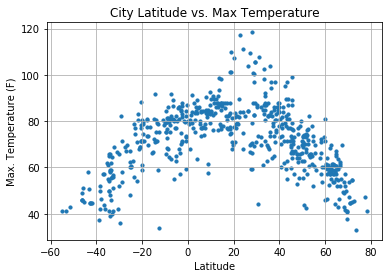

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Max_Temp_vs_Latitude.png")

#### Latitude vs. Humidity Plot

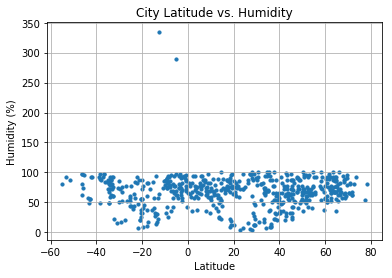

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

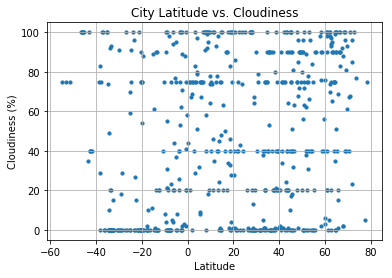

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

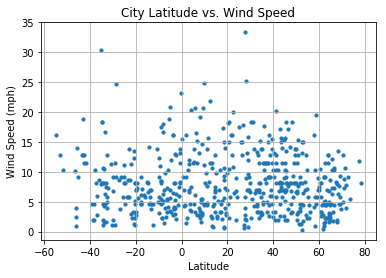

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Wind_Speed_vs_Latitude.png")
plt.show()